# Linear Regression Algorithm
## Jade Gee

---
---
## Background

Linear Regression (LR) is a supervised learning algorithm that is applied to real valued target functions in order to predict a range of possible outputs for a given input. LR does not make classifications. It is used to show relationships with dependencies between feature measures and their labels. For example, you can relate:

+ the force for stretching a spring to the distance the spring stretches, or

+ the salary of an employee to the employee's age and experience (pictured below)

![LRsample](LR.jpg)

In this, we assume that the targets are close to some linear combination of the data points in the input. Unlike other machine learning algorithms, linear regression has a closed-form solution which means that there is an equation that solves linear regression. The closed-form solution is found utilizing: $$\hat w = (X^T X)^{-1} X^T y$$

---

The purpose of this notebook is to demonstrate the implementation of linear regression using the [Car Details v3](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho) data set. This data set contains information on used cars listed on the [Cardekho website](www.cardekho.com). There are 13 columns within the data set; however, for this purpose of linear regression, we will only focus on two of the columns:

+ `year`: Year of the vehicle
+ `selling_price`: price the vehicle was sold at in 

---

## Gather the Data

In order to begin, we will need to import the following libraries:

+ `CSV`
    - To import our data set
    
+ `Plots`
    - To plot our data for better visualization
    
+ `Random`
    - To create a random subset of our data

In [312]:
using Plots
using Random
using CSV
using Statistics

Now, we will import the data from the .csv file `car_details_v3.csv`, then focus on the `year` and `selling_price` columns as previously stated. To focus on those two columns, we must extract them from the data set.

In [308]:
car_data = CSV.read("car_details_v3.csv");
car_data[1:5,:]

# Extract the two columns out of the data set for x- and y-values
year_x = [x for x in car_data[:,2]]
sell_price_y = [x for x in car_data[:,3]]

8128-element Array{Int64,1}:
 450000
 370000
 158000
 225000
 130000
 440000
  96000
  45000
 350000
 200000
 500000
  92000
 280000
      ⋮
 340000
 625000
 380000
 360000
 120000
 260000
 475000
 320000
 135000
 382000
 290000
 290000

Once the data has been accurately extracted, we combine our x- and y-values into a single tuple and plot it to see what our data set looks like.

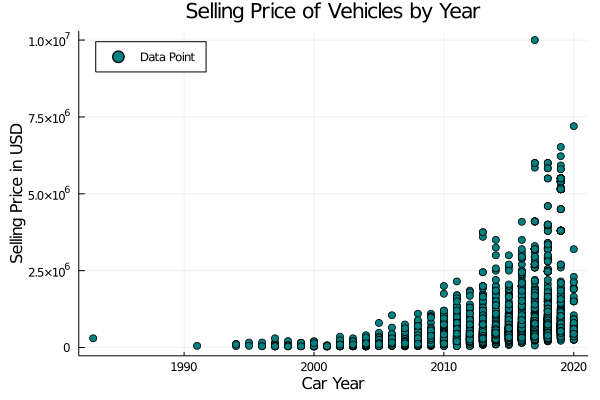

In [307]:
data = [x for x in zip(year_x, sell_price_y)]

scatter([p for p in data],
yaxis = "Selling Price in USD",
xaxis = "Car Year",
title = "Selling Price of Vehicles by Year",
legend = :topleft, label = "Data Point", color = "teal")

Now that we can truly visualize our data set, we need to split the data into a training set and a testing set. In order to do this we will use `randsubseq` from the `Random` library to randomly select data points from the data set that have a probability of 0.5. These selected data points will be designated as the training data; and, all of the points in the original data, `data`, that are not in `training_data` will become the testing data, `test_data`.

In [273]:
# Split Data into a Training set and a Testing Set
# Randomly select data points from the full data set
# to make a training data set

# Randomly selects the data points from the original data
training_data = randsubseq(data, .5); 

# Assigns the first column to the x-values
training_set_x = [x[1] for x in training_data]

# Assigns the second column to the y-values
training_set_y = [x[2] for x in training_data]

# Takes all points in the original data that are not in 
# the training data and stores them as the test data
test_data = [x for x in data if x ∉ training_data];

---

## Implement the regression

Once our data has been extracted from the data set and correctly stored, we must solve our equation. To do this we must implement the closed form solution to linear regression: $$\hat w = (X^T X)^{-1} X^T y$$

However, in order to implement this equation, we must first create the matrix `X` which will have rows equal to the number of rows in `training_set_x`--which contains all of our x-values-- and 2 columns. The first column will contain the x-values while the second will contain ones.

Once our matrix `X` has been created, we can then solve for `ŵ`.

In [274]:
# First make the matrix X

X = ones(length(training_set_x), 2)
X[:,1] = training_set_x

# Next Solve for ŵ

ŵ = (X'*X)\(X'*training_set_y)

2-element Array{Float64,1}:
 85249.79887043792
    -1.710392326727394e8

Once `ŵ` has been solved for, we can define the regression line by creating a function that takes the values in `ŵ` and `x` to get y-values to plot the line of regression.

In [309]:
# Define the regression line
"""
This function takes in an x-value and solves for a 
y-value to generate the points needed to plot the
learned line of regression.

ŵ:   the weights found
x:   the x-values in the data set

Returns: the y-value associated with the given x-value
"""

LRpredict(x) = ŵ[1]*x + ŵ[2];

With our regression line predictor function, `LRpredict`, we can now plug in our x-values from `training_set_x` and overlay the plot on our `training_data` plot. This will allow us to see where our regression line falls and whether it appears to be an accurately model the variables' relationship to one another.

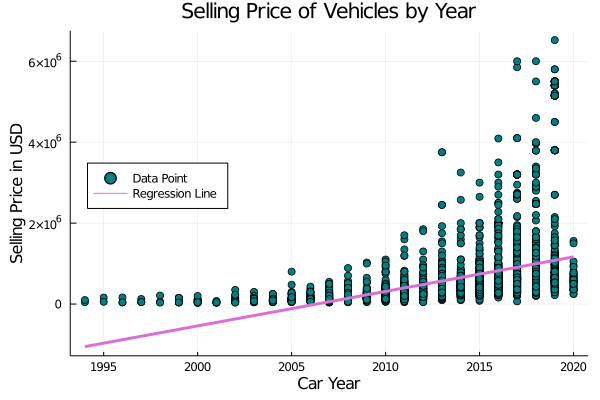

In [287]:
scatter([p for p in training_data],
yaxis = "Selling Price in USD",
xaxis = "Car Year",
title = "Selling Price of Vehicles by Year",
legend = :left, label = "Data Point", color = "teal")

plot!([(x, LRpredict(x)) for x = training_set_x],
        color = "orchid", lw = 3, label = "Regression Line")

---
## Error Measurements

While our regression line seems to be accurate, it helps to calculate the error and plot the maximum and minimum deviations. To do this, we must create an array that contains all of the error values where, $$error = \lvert (\hat y - y) \rvert$$ for every corresponding $x$ in the training data. We will also create a function that calculates these bounds for future comparison to our plot of the training data.

In [331]:
error_array = [abs(LRpredict(x[1])-x[2]) for x in training_data];

print("Maximum error value in error array: ", maximum(error_array))

Maximum error value in error array: 5.442888753325224e6

In [332]:
LRprediction_interval(x) = (LRpredict(x) - maximum(error_array), LRpredict(x) + maximum(error_array))

# Test the LR interval function
LRprediction_interval(1995)

(-6.408772679540962e6, 4.477004827109486e6)

With our error information stored, the maximum error value now known, and our linear regression interval prediction function created; we are able to plot our regression line +/- the maximum error and compare it to the results of our predictor function `LRprediction_interval`. This will allow us to see whether our data is within our maximum and minimum boundaries generated by the learned regression line within the deviations and ensure that our predictor function matches that of our graph.

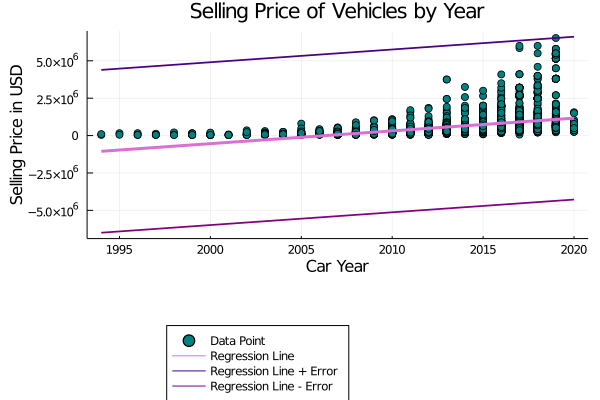

In [319]:
scatter([p for p in training_data],
yaxis = "Selling Price in USD",
xaxis = "Car Year",
title = "Selling Price of Vehicles by Year",
color = "teal", label = "Data Point", legend = :outerbottom)

plot!([(x, LRpredict(x)) for x = training_set_x],
        color = "orchid", lw = 3, label = "Regression Line")

plot!([(x, LRpredict(x) + maximum(error_array)) for x = training_set_x],
        color = "indigo", lw = 1.75, label = "Regression Line + Error")

plot!([(x, LRpredict(x) - maximum(error_array)) for x = training_set_x],
        color = "purple", lw = 1.75, label = "Regression Line - Error")

## Conclusion

As we can see from our last plot coupled with our predictor function, our data is within the boundaries of the regression lines that factor in the maximum error. Likewise, the maximum error matches the results calculated by the predictor function. As such, we can see a positive correlation that suggests that when a vehicle is newer, the selling price is typically higher.

---
### For more information regarding Linear Regression, please see the following:

+ [Linear Regression for Machine Learning](https://machinelearningmastery.com/linear-regression-for-machine-learning/)
+ [Introduction to Machine Learning Algorithms Linear Regression](https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a)
+ [Linear Regression on Wiki](https://en.wikipedia.org/wiki/Linear_regression)
+ [Geeks for Geeks: ML Linear Regression](https://www.geeksforgeeks.org/ml-linear-regression/)

---
---